<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part4_Gan_smote_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
adj = pd.read_pickle('/content/drive/MyDrive/test/TTdata.pkl')

In [9]:
CF = pd.read_pickle('/content/drive/MyDrive/test/TCFdf.pkl')

In [22]:
TF = pd.read_pickle('/content/drive/MyDrive/test/TTFdf1.pkl')

In [24]:
jaccardsimilarity = pd.read_pickle('/content/drive/MyDrive/test/TjaccardsimilaritydfR.pkl')

In [27]:
cosine = pd.read_pickle('/content/drive/MyDrive/test/TcosinesimilaritydfR.pkl')

In [13]:
L1_normdf = pd.read_pickle('/content/drive/MyDrive/test/TL1normdf.pkl')

In [14]:
wsumdf = pd.read_pickle('/content/drive/MyDrive/test/Tsum.pkl')

In [15]:
wmuldf = pd.read_pickle('/content/drive/MyDrive/test/Tmul.pkl')

In [16]:
adjadamicadardf = pd.read_pickle('/content/drive/MyDrive/test/Tadjadamicadardf.pkl')

In [17]:
correlationdf = pd.read_pickle('/content/drive/MyDrive/test/correlationdf.pkl')

In [19]:
euclideansimilaritydf = pd.read_pickle('/content/drive/MyDrive/test/euclideansimilaritydf.pkl')

In [10]:
adjl = pd.read_pickle('/content/drive/MyDrive/test/TLdata.pkl')

In [12]:
#CF
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

#oversample1=SMOTETomek(0.330)
oversample1 = SMOTE(sampling_strategy=0.334)
CF_smote,CF_label= oversample1.fit_resample(CF,adjl['label'])

In [20]:
count=0
for i in range (0,len(CF_label)):
  if CF_label[i]==1:
    count+=1
print(count)

990


In [23]:
#TF
oversample2 = SMOTE(sampling_strategy=0.334)
TF_smote,TF_label= oversample2.fit_resample(TF,adjl['label'])

In [26]:
#jaccardsimilarity
oversample3 = SMOTE(sampling_strategy=0.334)
jaccard_similarity_smote,jaccard_similarity_label= oversample3.fit_resample(jaccardsimilarity,
                                                                            adjl['label'])

In [28]:
#cosine_similarity
oversample4 = SMOTE(sampling_strategy=0.334)
cosine_similarity_smote,cosine_similarity_label= oversample4.fit_resample(cosine,
                                                                          adjl['label'])

In [29]:
#L1_norm
oversample5 = SMOTE(sampling_strategy=0.334)
L1_norm_smote,L1_norm_label= oversample5.fit_resample(L1_normdf,adjl['label'])

In [30]:
#wsum
oversample6 = SMOTE(sampling_strategy=0.334)
wsum_smote,wsum_label= oversample6.fit_resample(wsumdf,adjl['label'])

In [31]:
#wmul
oversample7 = SMOTE(sampling_strategy=0.334)
wmul_smote,wmul_label= oversample7.fit_resample(wmuldf,adjl['label'])

In [33]:
oversample8 = SMOTE(sampling_strategy=0.334)
adjadamicadar_smote,adjadamicadar_label= oversample8.fit_resample(adjadamicadardf,adjl['label'])

In [34]:
oversample9 = SMOTE(sampling_strategy=0.334)
correlation_smote,correlation_label= oversample9.fit_resample(correlationdf,adjl['label'])

In [35]:
oversample10 = SMOTE(sampling_strategy=0.334)
euclideansimilarity_smote,euclideansimilarity_label= oversample10.fit_resample(euclideansimilaritydf,adjl['label'])

# **Pca / T_sne**

In [86]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=10)
CF_pca = pca.fit_transform(CF_smote)
CF_pca_df=pd.DataFrame(CF_pca)
CF_pca_df1=pd.DataFrame(CF_pca)

In [62]:
CF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(CF_pca)
CF_TSNE_df=pd.DataFrame(CF_TSNE)

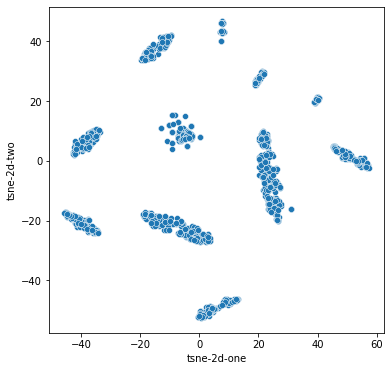

In [87]:

CF_pca_df1['tsne-2d-one'] = CF_TSNE[:,0]
CF_pca_df1['tsne-2d-two'] = CF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=CF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [88]:
pca = PCA(n_components=10)
TF_pca = pca.fit_transform(TF_smote)
TF_pca_df=pd.DataFrame(TF_pca)
TF_pca_df1=pd.DataFrame(TF_pca)

In [65]:
TF_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(TF_pca)
TF_TSNE_df=pd.DataFrame(TF_TSNE)

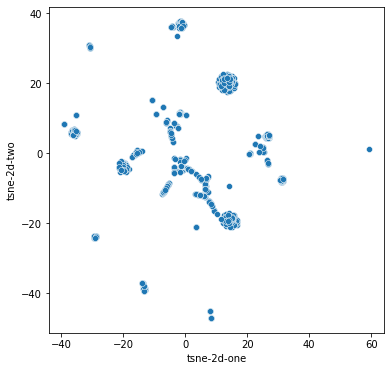

In [89]:

TF_pca_df1['tsne-2d-one'] = TF_TSNE[:,0]
TF_pca_df1['tsne-2d-two'] = TF_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=TF_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [90]:
pca = PCA(n_components=10)
jaccard_similarity_pca = pca.fit_transform(jaccard_similarity_smote)
jaccard_similarity_pca_df=pd.DataFrame(jaccard_similarity_pca)
jaccard_similarity_pca_df1=pd.DataFrame(jaccard_similarity_pca)

In [69]:
jaccard_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(jaccard_similarity_pca)
jaccard_similarity_TSNE_df=pd.DataFrame(jaccard_similarity_TSNE)

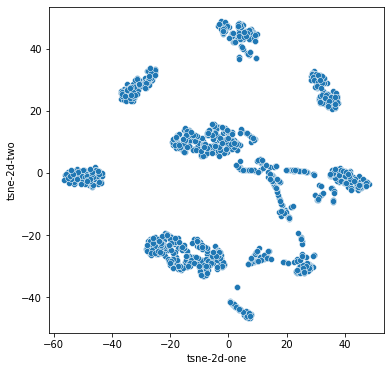

In [91]:
jaccard_similarity_pca_df1['tsne-2d-one'] = jaccard_similarity_TSNE[:,0]
jaccard_similarity_pca_df1['tsne-2d-two'] = jaccard_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=jaccard_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [92]:
pca = PCA(n_components=10)
cosine_similarity_pca = pca.fit_transform(cosine_similarity_smote)
cosine_similarity_pca_df=pd.DataFrame(cosine_similarity_pca)
cosine_similarity_pca_df1=pd.DataFrame(cosine_similarity_pca)

In [72]:
cosine_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(cosine_similarity_pca)
cosine_similarity_TSNE_df=pd.DataFrame(cosine_similarity_TSNE)

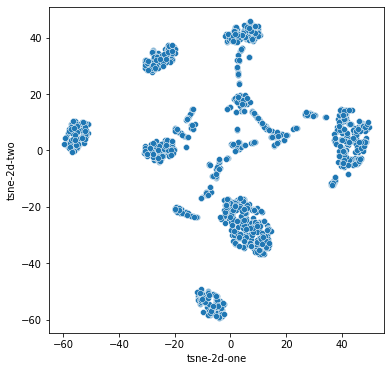

In [93]:
cosine_similarity_pca_df1['tsne-2d-one'] = cosine_similarity_TSNE[:,0]
cosine_similarity_pca_df1['tsne-2d-two'] = cosine_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=cosine_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [94]:
pca = PCA(n_components=10)
L1_normdf_similarity_pca = pca.fit_transform(L1_norm_smote)
L1_normdf_similarity_pca_df=pd.DataFrame(L1_normdf_similarity_pca)
L1_normdf_similarity_pca_df1=pd.DataFrame(L1_normdf_similarity_pca)

In [75]:
L1_normdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(L1_normdf_similarity_pca)
L1_normdf_similarity_TSNE_df=pd.DataFrame(L1_normdf_similarity_TSNE)

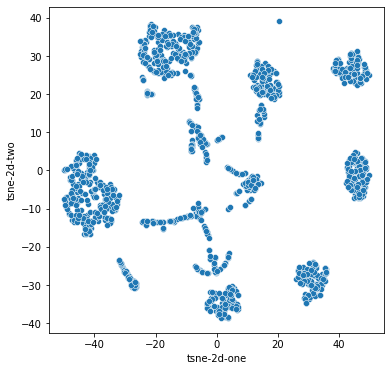

In [95]:
L1_normdf_similarity_pca_df1['tsne-2d-one'] = L1_normdf_similarity_TSNE[:,0]
L1_normdf_similarity_pca_df1['tsne-2d-two'] = L1_normdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=L1_normdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [96]:
pca = PCA(n_components=10)
wsumdf_similarity_pca = pca.fit_transform(wsum_smote)
wsumdf_similarity_pca_df=pd.DataFrame(wsumdf_similarity_pca)
wsumdf_similarity_pca_df1=pd.DataFrame(wsumdf_similarity_pca)

In [78]:
wsumdf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wsumdf_similarity_pca)
wsumdf_similarity_TSNE_df=pd.DataFrame(wsumdf_similarity_TSNE)

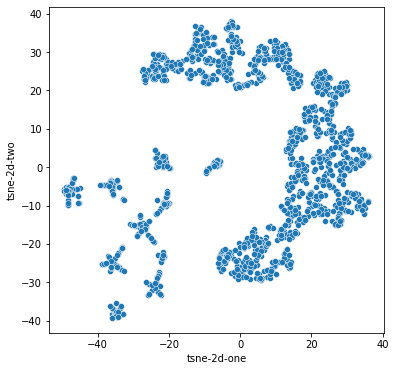

In [97]:
wsumdf_similarity_pca_df1['tsne-2d-one'] = wsumdf_similarity_TSNE[:,0]
wsumdf_similarity_pca_df1['tsne-2d-two'] = wsumdf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wsumdf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [98]:
pca = PCA(n_components=10)
wmuldf_similarity_pca = pca.fit_transform(wmul_smote)
wmuldf_similarity_pca_df=pd.DataFrame(wmuldf_similarity_pca)
wmuldf_similarity_pca_df1=pd.DataFrame(wmuldf_similarity_pca)

In [81]:
wmuldf_similarity_TSNE = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(wmuldf_similarity_pca)
wmuldf_similarity_TSNE_df=pd.DataFrame(wmuldf_similarity_TSNE)

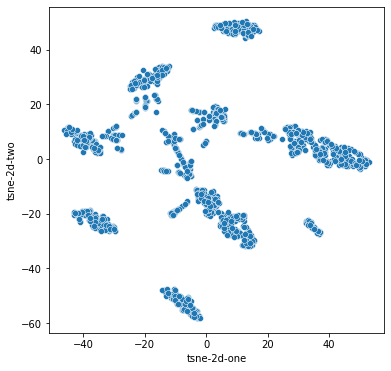

In [99]:
wmuldf_similarity_pca_df1['tsne-2d-one'] = wmuldf_similarity_TSNE[:,0]
wmuldf_similarity_pca_df1['tsne-2d-two'] = wmuldf_similarity_TSNE[:,1]
plt.figure(figsize=(6,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    #palette=sns.color_palette("hls", 10),
    data=wmuldf_similarity_pca_df1,
    #legend="full",
    #alpha=0.3
)

In [100]:
#concat
frames = [CF_pca_df, TF_pca_df, jaccard_similarity_pca_df,cosine_similarity_pca_df,
          L1_normdf_similarity_pca_df,wsumdf_similarity_pca_df,wmuldf_similarity_pca_df,CF_label]
result = pd.concat(frames,axis=1)

In [101]:
result

,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,0,1,2,3,4,5,6,7,8,9,label
0,-1.451563,-3.158015,-0.040985,-2.124826e-14,2.468214e-14,0.078314,2.372811,-1.421917,-0.000601,-0.000466,-102.991834,0.383558,0.088019,-0.524355,-0.001751,8.819706e-11,4.264767e-11,0.004717,-2.221611,-0.218229,-1.367089,-3.644380,-0.166910,-0.335420,-0.055829,1.710604e-14,1.461212,3.186222,-0.037068,-0.058313,-1.433752,-3.508578,-0.235558,-0.411706,-0.055588,5.997665e-14,1.375584,3.226456,-0.066865,0.009486,-1.365012,-3.544244,-0.260009,-0.374206,-0.055655,5.129226e-15,1.449726,3.174196,-0.064185,0.017385,-0.292589,-0.059962,-0.075792,-0.026071,-0.048351,-0.019421,-0.021397,-0.011183,-0.008088,-0.013878,-0.242678,-0.557415,-0.058785,-0.098128,-0.009416,-3.606062e-15,0.197692,0.714683,-9.975066e-16,-0.044126,1
1,-1.451563,-3.158015,-0.040985,7.299153e-15,4.454835e-14,0.078314,2.372811,-1.421917,-0.000601,-0.000466,-102.991834,0.383558,0.088019,-0.524355,-0.001751,-4.513986e-13,2.357055e-12,0.004717,-2.221611,-0.218229,-1.367089,-3.644380,-0.166910,-0.335420,-0.055829,3.176619e-14,1.461212,3.186222,-0.037068,-0.058313,-1.433752,-3.508578,-0.235558,-0.411706,-0.055588,3.040227e-14,1.375584,3.226456,-0.066865,0.009486,-1.365012,-3.544244,-0.260009,-0.374206,-0.055655,-3.797384e-14,1.449726,3.174196,-0.064185,0.017385,-0.292589,-0.059962,-0.075792,-0.026071,-0.048351,-0.019421,-0.021397,-0.011183,-0.008088,-0.013879,-0.242678,-0.557415,-0.058785,-0.098128,-0.009416,-4.056795e-15,0.197692,0.714683,-1.040649e-15,-0.044126,1
2,-1.451563,-3.158015,-0.040985,-2.777259e-13,-1.414840e-13,0.078314,2.372811,-1.421917,-0.000601,-0.000466,-102.991834,0.383558,0.088019,-0.524355,-0.001751,2.675890e-13,2.739301e-12,0.004717,-2.221611,-0.218229,-1.367089,-3.644380,-0.166910,-0.335420,-0.055829,-2.190070e-14,1.461212,3.186222,-0.037068,-0.058313,-1.433752,-3.508578,-0.235558,-0.411706,-0.055588,4.601791e-14,1.375584,3.226456,-0.066865,0.009486,-1.365012,-3.544244,-0.260009,-0.374206,-0.055655,-7.271195e-15,1.449726,3.174196,-0.064185,0.017385,-0.292589,-0.059962,-0.075792,-0.026071,-0.048351,-0.019421,-0.021397,-0.011183,-0.008088,-0.013878,-0.242678,-0.557415,-0.058785,-0.098128,-0.009416,4.401725e-15,0.197692,0.714683,-1.006246e-15,-0.044126,1
3,-1.451563,-3.158015,-0.040985,-3.789834e-14,9.692992e-14,0.078314,2.372811,-1.421917,-0.000601,-0.000466,-102.991834,0.383558,0.088019,-0.524355,-0.001751,1.931853e-13,-5.831784e-14,0.004717,-2.221611,-0.218229,-1.367089,-3.644380,-0.166910,-0.335420,-0.055829,1.718569e-14,1.461212,3.186222,-0.037068,-0.058313,-1.433752,-3.508578,-0.235558,-0.411706,-0.055588,-2.557140e-14,1.375584,3.226456,-0.066865,0.009486,-1.365012,-3.544244,-0.260009,-0.374206,-0.055655,-2.604098e-15,1.449726,3.174196,-0.064185,0.017385,-0.292589,-0.059962,-0.075792,-0.026071,-0.048351,-0.019421,-0.021397,-0.011183,-0.008088,-0.013878,-0.242678,-0.557415,-0.058785,-0.098128,-0.009416,-1.587781e-15,0.197692,0.714683,-9.964925e-16,-0.044126,1
4,-1.451563,-3.158015,-0.040985,-1.694571e-14,3.701731e-14,0.078314,2.372811,-1.421917,-0.000601,-0.000466,1315.242198,57.537629,-38.774207,-0.272194,-0.478054,6.126634e-13,2.156667e-12,0.890438,-1.831993,-0.498416,-1.367089,-3.644380,-0.166910,-0.335420,-0.055829,1.332294e-14,1.461212,3.186222,-0.037068,-0.058313,-1.433752,-3.508578,-0.235558,-0.411706,-0.055588,3.766576e-14,1.375584,3.226456,-0.066865,0.009486,-1.365012,-3.544244,-0.260009,-0.374206,-0.055655,3.840639e-14,1.449726,3.174196,-0.064185,0.017385,17.419727,-0.052902,-0.104561,-0.009063,0.023198,-0.059665,-0.017211,0.008785,-0.000016,0.035103,-0.242678,-0.557415,-0.058785,-0.098128,-0.009416,8.820413e-15,0.197692,0.714683,-1.020152e-15,-0.044126,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
with pd.HDFStore('/content/drive/MyDrive/1000/part2_result',  mode='w') as store:
      store.append('result', result,format='table')